# Visualización de Datos

## Gráfico de Barras y Mapas de Calor

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Seleccionar un conjunto de datos

En este tutorial, trabajaremos con un conjunto de datos del Departamento de Transporte de EE. UU. Que rastrea los retrasos en los vuelos.

Al abrir este archivo CSV en Excel, se muestra una fila para cada mes (donde `1` = enero, `2` = febrero, etc.) y una columna para cada código de línea aérea.

![excel_us](https://i.imgur.com/5nYs9se.png)

Cada entrada muestra el retraso promedio de llegada (en minutos) para una aerolínea y un mes diferentes (todo en el año 2015). Las entradas negativas denotan vuelos que (*en promedio*) tienden a llegar antes. Por ejemplo, el vuelo promedio de American Airlines (código de la *aerolínea*: **AA**) en enero llegó aproximadamente 7 minutos tarde, y el vuelo promedio de Alaska Airlines (código de la *aerolínea*: **AS**) en abril llegó aproximadamente 3 minutos antes.

### Cargar los datos

Cargamos el conjunto de datos usando el comando `pd.read_csv`.

In [2]:
# Ruta del archivo a leer
flight_filepath = "./input/flight_delays.csv"

# Lee el archivo en la variable flight_data
flight_data = pd.read_csv(flight_filepath, index_col="Month")

Podemos observar que el código es un poco más corto que el que usamos en el tutorial anterior. En este caso, dado que las etiquetas de fila (de la columna `"Month"`) no corresponden a fechas, no agregamos `parse_dates = True` entre paréntesis. Pero, conservamos los dos primeros textos como antes, para proporcionar:

+ la ruta del archivo para el conjunto de datos (en este caso, `flight_filepath`) y
+ el nombre de la columna que se usará para indexar las filas (en este caso, `index_col = "Month"`).

In [3]:
# Mostramos los datos
flight_data

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260


### Gráfico de barras

Supongamos que quisiéramos crear un gráfico de barras que muestre el retraso promedio de llegada de los vuelos de Spirit Airlines (código de línea aérea: **NK**), por mes.

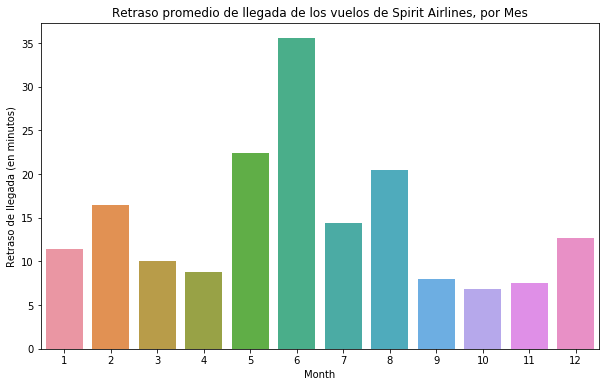

In [4]:
# Establece el ancho y la altura de la figura
plt.figure(figsize=(10,6))

# Añade el título
plt.title("Retraso promedio de llegada de los vuelos de Spirit Airlines, por Mes")

# gráfico de barras mostrando el retraso promedio de llegada de los vuelos de Spirit Airlines por mes
sns.barplot(x=flight_data.index, y=flight_data['NK'])

# Añade etiqueta para el eje vertical
plt.ylabel("Retraso de llegada (en minutos)");

Los comandos para personalizar el texto (título y etiqueta del eje vertical) y el tamaño de la figura son familiares en el tutorial anterior. El código que crea el gráfico de barras es nuevo. Tiene tres componentes principales:

+ `sns.barplot` - esto le dice al notebook que queremos crear un gráfico de barras.
+ `x = flight_data.index` - determina qué usar en el eje horizontal. En este caso, hemos seleccionado la columna que indexa las filas (en este caso, la columna que contiene los meses).
+ `y = flight_data['NK']` - Esto establece la columna de los datos que se usarán para determinar la altura de cada barra. En este caso, seleccionamos la columna `"NK"`.

> **Nota importante**: debe seleccionar la columna de indexación con `flight_data.index` y no es posible usar `flight_data['Month']` (*que devolverá un error*). Esto se debe a que cuando cargamos el conjunto de datos, la columna `"Month"` se usó para indexar las filas. **Siempre tenemos que usar esta notación especial para seleccionar la columna de indexación**.

### Mapa de calor

En la celda de código a continuación, creamos un mapa de calor para visualizar rápidamente patrones en `flight_data`. Cada celda está codificada por colores de acuerdo con su valor correspondiente.

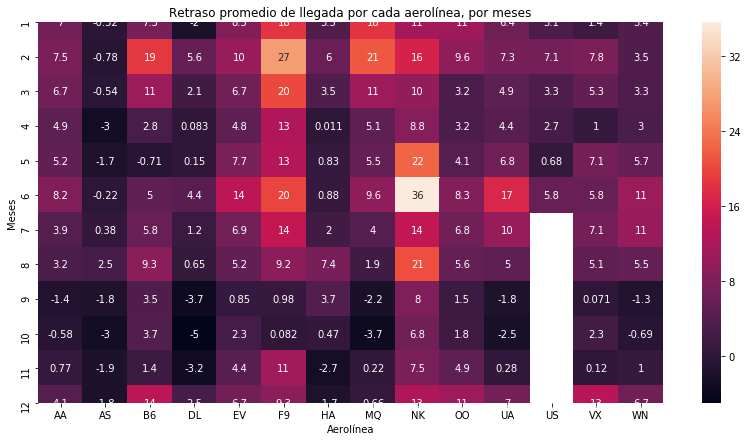

In [5]:
# Establece el ancho y la altura de la figura
plt.figure(figsize=(14,7))

# Añade el título
plt.title("Retraso promedio de llegada por cada aerolínea, por meses")

# Mapa de calor mostranro el retraso promedio de llegada por cada aerolínea, por meses
sns.heatmap(data=flight_data, annot=True)

# Añade etiqueta para el eje horizontal
plt.xlabel("Aerolínea")
plt.ylabel("Meses");

Este código tiene tres componentes principales:

+ `sns.heatmap` - esto le dice al notebook que queremos crear un mapa de calor.
+ `data = flight_data`- esto le dice al notebook que use todas las entradas en `flight_data` para crear el mapa de calor.
+ `annot = True`- esto garantiza que los valores de cada celda aparezcan en el gráfico. (*Dejar esto fuera elimina los números de cada una de las celdas*)

*¿Qué patrones puedes detectar en la tabla? Por ejemplo, si observas de cerca, los meses hacia el final del año (especialmente los meses 9-11) parecen relativamente oscuros para todas las aerolíneas. Esto sugiere que las aerolíneas son mejores (en promedio) para mantener el horario durante estos meses.*

## Ejercicio

En este ejercicio, utilizaremos los nuevos conocimientos para proponer una solución a un escenario del mundo real.

### Escenario

¡Recientemente has decidido crear tu propio videojuego! Como un ávido lector de [IGN Game Reviews](https://www.ign.com/reviews/games), escuchas sobre todos los lanzamientos de juegos más recientes, junto con la clasificación que han recibido de los expertos, que van desde 0 (_Disaster_) a 10 (_Masterpiece_).

![ex2_ign](https://i.imgur.com/Oh06Fu1.png)

Te interesa usar [IGN reviews](https://www.ign.com/reviews/games) para guiar el diseño de tu próximo juego. Afortunadamente, alguien ha resumido las clasificaciones en un archivo CSV realmente útil que puede usar para guiar su análisis.

### Configuración

In [6]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Paso 1: Cargar los datos

Lee el archivo de datos IGN en `ign_data`. Usa la columna `"Platform"` para etiquetar las filas.

In [7]:
# Ruta del archivo a leer
ign_filepath = "./input/ign_scores.csv"

ign_data = pd.read_csv(ign_filepath, index_col="Platform")

### Paso 2: Revisar los datos

Usa un comando Python para mostrar el conjunto de datos completo

In [8]:
ign_data

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000
Game Boy Color,6.272727,8.166667,5.307692,4.500000,6.352941,6.583333,7.285714,5.897436,4.500000,5.900000,5.790698,7.400000
GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
Nintendo 3DS,6.670833,7.481818,7.414286,6.614286,7.503448,8.000000,7.719231,6.900000,7.033333,7.700000,6.388889,7.900000
Nintendo 64,6.649057,8.250000,7.000000,5.681250,6.889655,7.461538,6.050000,6.939623,8.042857,5.675000,6.967857,6.900000
Nintendo DS,5.903608,7.240000,6.259804,6.320000,6.840000,6.604615,7.222619,6.038636,6.965217,5.874359,5.936667,6.644737
Nintendo DSi,6.827027,8.500000,6.090909,7.500000,7.250000,6.810526,7.166667,6.563636,6.500000,5.195652,5.644444,6.566667
PC,6.805791,7.334746,7.136798,7.166667,7.410938,6.924706,7.759930,7.032418,7.084878,7.104889,6.902424,7.310207


El conjunto de datos que acabamos de imprimir muestra el puntaje promedio, por plataforma y género. Usa los datos para responder las siguientes preguntas.

In [9]:
# ¿Cuál es la puntuación promedio más alta recibida por los juegos de PC para cualquier plataforma?
high_score = 7.759930

# En la plataforma Playstation Vita, ¿qué género tiene el puntaje promedio más bajo?
worst_genre = 'Simulation'

### Paso 3: ¿Qué plataforma es la mejor?

Como puedes recordar, tu videojuego favorito ha sido [**Mario Kart Wii**](https://www.ign.com/games/mario-kart-wii), un juego de carreras lanzado para la plataforma Wii en 2008 e IGN está de acuerdo contigo en que es un gran juego, ¡su calificación para este juego es de 8.9! Inspirado por el éxito de este juego, estás considerando crear tu propio juego de carreras para la plataforma Wii.

#### Parte A

Crea un gráfico de barras que muestre la puntuación promedio para los juegos **racing**, para cada plataforma. El gráfico debe tener una barra para cada plataforma.

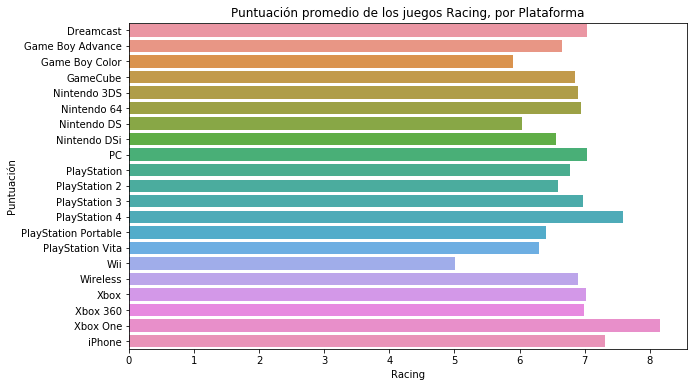

In [10]:
# Establece el ancho y la altura de la figura
plt.figure(figsize=(10,6))

# Añade el título
plt.title("Puntuación promedio de los juegos Racing, por Plataforma")

# gráfico de barras mostrando el retraso promedio de llegada de los vuelos de Spirit Airlines por mes
sns.barplot(x=ign_data['Racing'], y=ign_data.index)

# Añade etiqueta para el eje vertical
plt.ylabel("Puntuación");

#### Parte B

Según el gráfico de barras, ¿esperas que un juego de carreras para la plataforma **Wii** reciba una calificación alta? Si no, ¿qué plataforma de juego parece ser la mejor alternativa?

**Solución**: Según los datos, no deberíamos esperar que un juego de carreras para la plataforma Wii reciba una calificación alta. De hecho, en promedio, los juegos de carreras para Wii tienen puntajes más bajos que cualquier otra plataforma. Xbox One parece ser la mejor alternativa, ya que tiene las calificaciones promedio más altas.

### Paso 4: ¡Todas las combinaciones posibles!

Eventualmente, decides no crear un juego de carreras para Wii, ¡pero aún estás comprometido a crear tu propio videojuego! Debido a que tus intereses de juego son bastante amplios (_generalmente te encantan la mayoría de los videojuegos_), decides utilizar los datos de IGN para tu nueva elección de género y plataforma.

#### Parte A

Usa los datos para crear un mapa de calor de puntuación promedio por género y plataforma.

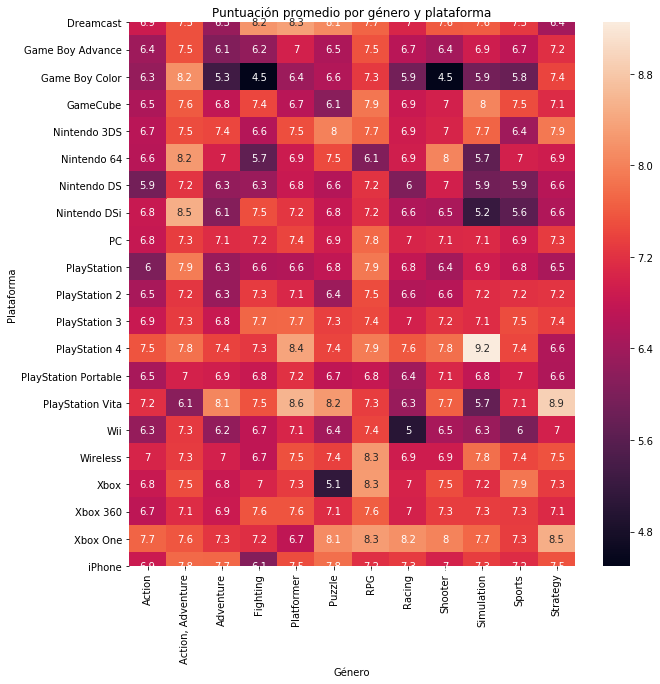

In [11]:
# Establece el ancho y la altura de la figura
plt.figure(figsize=(10,10))

# Añade el título
plt.title("Puntuación promedio por género y plataforma")

# Mapa de calor mostrando la puntuación promedio por género y plataforma
sns.heatmap(data=ign_data, annot=True)

# Añade etiqueta para el eje horizontal
plt.xlabel("Género")
plt.ylabel("Plataforma");

#### Parte B

¿Qué combinación de género y plataforma recibe las calificaciones promedio más altas? ¿Qué combinación recibe la clasificación promedio más baja?

**Solución**: Los juegos de **Simulation** para **Playstation 4** reciben las calificaciones promedio más altas (9.2). Los juegos de **Shooting** y **Fighting** para **Game Boy Color** reciben la clasificación promedio más baja (4.5).